<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Заказчик: страховая компания «Хоть потоп». 

Цель: защитить данные клиентов.

Задача: разработать метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Дополнительно: 
1. требуется обоснование корректности его работы;
2. нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. 
Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
try:
    df = pd.read_csv(r'C:\Users\artfo\Documents\yandex_practicum\projects\10_insurance\insurance.csv')
except:
    df = pd.read_csv('/datasets/insurance.csv')
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [3]:
#переименуем столбцы
df.columns = ['sex', 'age', 'salary', 'family', 'payments']
df.head()

,sex,age,salary,family,payments
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       5000 non-null   int64  
 1   age       5000 non-null   float64
 2   salary    5000 non-null   float64
 3   family    5000 non-null   int64  
 4   payments  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
df.duplicated().sum()

153

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

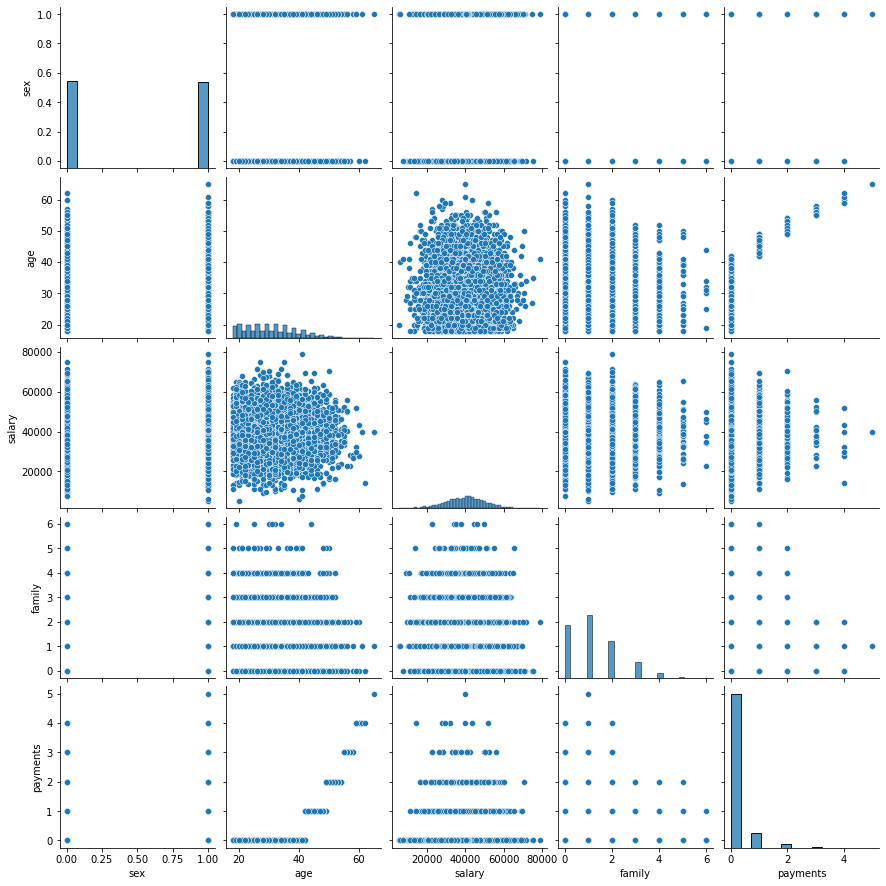

In [7]:
sns.pairplot(df);

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос:** Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

**Ответ:** Нет, не изменится

**Обоснование:** 

*Формулы предсказаний:*

$$
a_1 = X w_1
$$
$$
a_2 = P X w_2
$$

*Докажем, что $a_1 = a_2$, и, соответственно, $X w_1 = P X w_2$*

С помощью формулы весов вычисления линейной регрессии вычислим веса $w$

$$
w = (X^T X)^{-1} X^T y
$$

### Вывод

Мы можем зашифровать данные клиентов таким способом (умножив матрицу признаков на случайную обратимую матрицу) и обучить на них модель линейной регрессии, не потеряв в качестве

$$
a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w'
$$

$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} P^T X^T y
$$
$$
w' = P^{-1}(X^T X)^{-1}(P^T)^{-1}P^T X^Ty
$$

Т.к. $(P^T)^{-1} P^T = E$ получим:

$$
w' = P^{-1}(X^TX)^{-1}EX^Ty = P^{-1}(X^TX)^{-1}X^Ty
$$

Подставив формулу веса, получим, что: 

$$
w' = P^{-1}w
$$

Подставив это в формулу предсказаний, получаем:

$$
a_1 = XPP^{-1}w = XEw = Xw = a
$$

Получается, что $w' = P^{-1}w$

## Алгоритм преобразования

<div class="alert alert-info" style="border-color: green; border-radius: 5px">
    <p><u><b>Алгоритм</b></u></p>
1) создаём рандомную матрицу<br>
2) проверяем её на обратимость (создаём единичную матрицу)<br>
3) Создаём новую матрицу данных<br>
4) Ищем метрики качества на исходных данных и на преобразованных<br>
5) делаем вывод

<div class="alert alert-info" style="border-color: green; border-radius: 5px">
    <p><u><b>Обоснование</b></u></p>
Упомянутые выше метрики, судя по выводу в Главе 2, должны оказаться равны. В этом случае алгоритм преобразования данных функционирует и может быть использован для шифрования персональных данных клиентов.  

## Проверка алгоритма

In [10]:
def generate_invertible_matrix(size):
    try:
        matrix = np.random.normal(size=(size, size))
        # проверим матрицу на обратимость, если нет, пробуем сгенерировать еще раз
        # таким образом гарантируем, что матрица стопроцентно будет обратимой
        np.linalg.inv(matrix)
    except np.linalg.LinAlgError:
        matrix = generate_invertible_matrix()
    
    return matrix

In [19]:
Xrev = generate_invertible_matrix(4)
Xrev

array([[ 1.13459703,  1.36544739,  0.7282423 , -1.68797286],
       [ 0.39824542,  0.5907332 , -0.85719613,  0.77456959],
       [ 0.95390752,  0.05217859,  1.78840592,  1.33485772],
       [ 0.14365717,  0.61866016, -0.45818113, -0.83807402]])

In [20]:
features = df.drop('payments', axis=1)
target = df['payments']

In [21]:
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
r2_score_normal = round(r2_score(target, predictions), 5)
print('R2-метрика модели, обученной на обычных признаках:', r2_score_normal)

R2-метрика модели, обученной на обычных признаках: 0.4302


In [22]:
X_features = features @ Xrev

In [23]:
model = LinearRegression()
model.fit(X_features, target)
X_predictions = model.predict(X_features)
r2_score_X = round(r2_score(target, X_predictions), 5)
print('R2-метрика той же модели, но обученной на X-признаках:', r2_score_X)

R2-метрика той же модели, но обученной на X-признаках: 0.4302


In [24]:
if r2_score_normal == r2_score_X:
    print('Качество модели не изменилось, запускай алгоритм!')
else:
    print('Качество ухудшилось. Шифруй - не шифруй...')

Качество модели не изменилось, запускай алгоритм!


### Вывод

Был исследован алгоритм преобразования данных для обучения линейной регрессии. 

Суть алгоритма в умножении матрицы признаков на случайную обратимую матрицу с целью зашифровать данные.

В ходе исследования было доказано, что алгоритм работает и может применяться для сокрытия конфиденциальной информации  без ущерба для качества модели. 